In [1]:
pip install transformers langchain opencv-python numpy pillow



     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     ----------------------------------- -- 41.0/44.1 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 44.1/44.1 kB 434.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ---------------------------------------- 149.4/149.4 kB ? eta 0:00:00
     ---------------------------------------- 0.0/52.0 kB ? eta -:--:--
     ---------------------------------------- 52.0/52.0 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ------------- -------------------------- 3.4/10.0 MB 109.3 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/10.0 MB 91.4 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.0 MB 91.9 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.0 MB 91.9 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 53.6 MB/s eta 0:00:00
   

In [9]:
pip install langchain

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install langchain-community

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.4 MB 3.5 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.4 MB 2.6 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.4 MB 2.8 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.4 MB 3.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.4 MB 3.3 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.4 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.1/2.4 MB 3.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.4/2.4 MB 3.6 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.4 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.8/2.4 MB 3.6 MB/s eta 0:00:01
   --------------------------------- ------ 2.0/2.4 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 2.3/2.4 MB 3.9 MB/s eta 0:00:01
   ----------------

In [1]:
pip install openai tqdm

   ---------------------------------------- 0.0/389.6 kB ? eta -:--:--
   --------------------------------------- 389.6/389.6 kB 23.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/202.8 kB ? eta -:--:--
   --------------------------------------- 202.8/202.8 kB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
from transformers import pipeline
import os

# Step 1: Hugging Face Model Integration
# Load a pre-trained text-generation pipeline for natural language processing
nlp_pipeline = pipeline("text-generation", model="gpt2")

# Step 2: Function to Interpret User Commands
def interpret_command(command):
    """
    Use Hugging Face pipeline to interpret the user command and extract the animation type.
    """
    print("Interpreting command...")
    response = nlp_pipeline(command, max_length=20, num_return_sequences=1)
    generated_text = response[0]['generated_text']
    if "zoom" in generated_text.lower():
        return "zoom"
    elif "rotate" in generated_text.lower():
        return "rotate"
    elif "fade" in generated_text.lower():
        return "fade"
    else:
        raise ValueError(f"Could not interpret the command: {generated_text}")

# Step 3: Image Animation Effects
def apply_motion_effect(image_path, effect_type):
    """
    Generate frames for the specified motion effect.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image {image_path} not found.")
    height, width, _ = image.shape
    frames = []

    if effect_type == "zoom":
        print("Applying Zoom Effect...")
        for i in range(30):
            scale = 1 + i * 0.02
            resized = cv2.resize(image, None, fx=scale, fy=scale)
            crop_x = (resized.shape[1] - width) // 2
            crop_y = (resized.shape[0] - height) // 2
            cropped = resized[crop_y:crop_y+height, crop_x:crop_x+width]
            frames.append(cropped)
    elif effect_type == "rotate":
        print("Applying Rotation Effect...")
        for angle in range(0, 360, 12):
            center = (width // 2, height // 2)
            matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated = cv2.warpAffine(image, matrix, (width, height))
            frames.append(rotated)
    elif effect_type == "fade":
        print("Applying Fade Effect...")
        for alpha in np.linspace(0, 1, 30):
            blended = cv2.addWeighted(image, alpha, np.zeros_like(image), 1-alpha, 0)
            frames.append(blended)
    else:
        raise ValueError(f"Unsupported effect type: {effect_type}")
    
    return frames

# Step 4: Save Animation as Video
def save_animation(frames, output_path):
    """
    Save generated frames as a video file.
    """
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video = cv2.VideoWriter(output_path, fourcc, 10, (width, height))

    for frame in frames:
        video.write(frame)
    video.release()

# Step 5: Display Animation in Real-Time
def display_animation(frames):
    """
    Display the animation frames in real-time.
    """
    for frame in frames:
        cv2.imshow("Animation", frame)
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

# Main Function
if __name__ == "__main__":
    # Input image path
    input_image = "image.jpg"  # Replace with your image file
    if not os.path.exists(input_image):
        print(f"Input image {input_image} not found!")
        exit(1)

    # User command
    user_command = "Create a zoom animation from the image."  # Example command

    try:
        print("Processing user command...")
        animation_type = interpret_command(user_command)
        animation_frames = apply_motion_effect(input_image, animation_type)
        
        # Save and display the animation
        output_video = "output_animation.mp4"
        save_animation(animation_frames, output_video)
        print(f"Animation saved as {output_video}")
        print("Displaying the animation...")
        display_animation(animation_frames)
    except Exception as e:
        print(f"Error: {e}")


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

C:\Users\ADMIN\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ADMIN\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Processing user command...
Interpreting command...
Applying Zoom Effect...
Animation saved as output_animation.mp4
Displaying the animation...


In [ ]:
pip install tf-keras


In [5]:
pip install torch


   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/203.0 MB 7.8 MB/s eta 0:00:27
   ---------------------------------------- 0.8/203.0 MB 8.7 MB/s eta 0:00:24
   ---------------------------------------- 1.3/203.0 MB 9.4 MB/s eta 0:00:22
   ---------------------------------------- 1.8/203.0 MB 9.7 MB/s eta 0:00:21
   ---------------------------------------- 2.4/203.0 MB 10.3 MB/s eta 0:00:20
    --------------------------------------- 3.0/203.0 MB 10.8 MB/s eta 0:00:19
    --------------------------------------- 3.7/203.0 MB 11.3 MB/s eta 0:00:18
    --------------------------------------- 4.6/203.0 MB 12.3 MB/s eta 0:00:17
   - -------------------------------------- 5.4/203.0 MB 12.8 MB/s eta 0:00:16
   - -------------------------------------- 6.5/203.0 MB 13.9 MB/s eta 0:00:15
   - -------------------------------------- 7.4/203.0 MB 14.3 MB/s eta 0:00:14
   - -------------------------------------- 8.0/203.0 MB 14.3 MB

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Processing user command...
Interpreting command...
Extracted Features: [[ 2.67671626e-02 -1.88327539e+00 -4.34434861e-01 -5.82854211e-01
   4.03344989e-01 -5.66927433e-01 -4.68247570e-03 -8.29834700e-01
  -1.57412493e+00 -5.92180669e-01 -1.24503756e+00 -4.19900298e-01
  -1.00767732e+00 -1.97250235e+00 -4.99762774e-01 -4.91954476e-01
  -1.60018742e+00  2.35639080e-01 -1.18023074e+00 -2.39788204e-01
  -5.70947528e-01 -7.06461787e-01 -1.92285299e+00 -1.20404673e+00
  -1.23799932e+00 -6.33073092e-01 -1.63810635e+00 -3.94379705e-01
   1.03440203e-01 -7.75689363e-01 -9.63846505e-01 -1.61151305e-01
  -6.14536285e-01 -7.49233246e-01  6.65816367e-01 -1.12521148e+00
  -9.49819386e-02 -1.04999173e+00 -6.81581870e-02 -2.21154675e-01
  -5.72759092e-01 -4.42128748e-01 -5.91755092e-01 -1.07096601e+00
  -7.90999651e-01 -7.71618247e-01 -1.49022862e-01 -1.51857853e-01
  -9.94102299e-01 -1.04336286e+00 -1.34328866e+00 -2.30801627e-01
  -3.35592538e-01  9.40367430e-02 -2.58699149e-01 -7.65431523e-01
  -2.

Saving Video: 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 323.39it/s]


Animation saved as output_animation.mp4


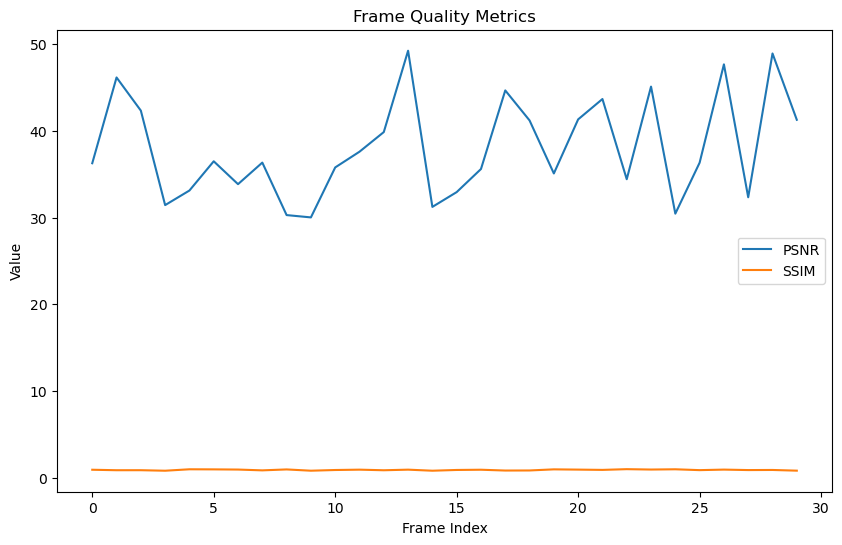

In [3]:
import cv2
import numpy as np
from transformers import pipeline, ViTFeatureExtractor, ViTForImageClassification, GPT2LMHeadModel, GPT2Tokenizer
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Initialize Hugging Face NLP Model
try:
    # Use pre-trained GPT-2 with PyTorch backend for NLP
    nlp_pipeline = pipeline("text-generation", model="gpt2", framework="pt")
except ValueError as e:
    print(f"Pipeline error: {e}. Switching to manual GPT-2 model loading.")
    # Fallback to manual GPT-2 model loading
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    def nlp_pipeline(text, max_length=20):
        inputs = tokenizer(text, return_tensors="pt", max_length=max_length, truncation=True)
        outputs = model.generate(**inputs, max_length=max_length)
        return [{"generated_text": tokenizer.decode(outputs[0], skip_special_tokens=True)}]

# Initialize Vision Transformer (ViT)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
vision_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# Extract Features Using Vision Transformer
def extract_features(image_path):
    """
    Extract embeddings from the image using Vision Transformer.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image {image_path} not found.")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = vision_model(**inputs)
    return outputs.logits.detach().numpy()

# Interpret User Commands Using NLP Pipeline
def interpret_command(command):
    """
    Interpret user commands using Hugging Face NLP pipeline.
    """
    print("Interpreting command...")
    response = nlp_pipeline(command, max_length=20, num_return_sequences=1, truncation=True)
    generated_text = response[0]['generated_text']
    if "zoom" in generated_text.lower():
        return "zoom"
    elif "rotate" in generated_text.lower():
        return "rotation"
    elif "depth" in generated_text.lower():
        return "depth_effect"
    elif "blur" in generated_text.lower():
        return "blur_effect"
    elif "blend" in generated_text.lower():
        return "blend_effect"
    else:
        raise ValueError(f"Could not interpret the command: {generated_text}")

# Generate Animation Frames for the Specified Effect
def generate_frames(image_path, effect_type):
    """
    Generate animation frames for the specified effect.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image {image_path} not found.")
    height, width, _ = image.shape
    frames = []

    if effect_type == "zoom":
        print("Applying Zoom Effect...")
        for i in np.linspace(1, 2, 30):
            scaled = cv2.resize(image, None, fx=i, fy=i)
            x_start = (scaled.shape[1] - width) // 2
            y_start = (scaled.shape[0] - height) // 2
            cropped = scaled[y_start:y_start+height, x_start:x_start+width]
            frames.append(cropped)
    elif effect_type == "rotation":
        print("Applying Rotation Effect...")
        for angle in range(0, 360, 10):
            M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
            rotated = cv2.warpAffine(image, M, (width, height))
            frames.append(rotated)
    elif effect_type == "depth_effect":
        print("Applying Depth Effect...")
        for depth in np.linspace(0, 1, 30):
            alpha = 1 - depth
            overlay = cv2.addWeighted(image, alpha, np.zeros_like(image), 1 - alpha, 0)
            frames.append(overlay)
    elif effect_type == "blur_effect":
        print("Applying Blur Effect...")
        for kernel_size in range(1, 30, 2):
            blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            frames.append(blurred)
    elif effect_type == "blend_effect":
        print("Applying Blended Effects...")
        for i in range(30):
            scale = 1 + i * 0.02
            angle = i * 12
            M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
            rotated = cv2.warpAffine(image, M, (width, height))
            scaled = cv2.resize(image, None, fx=scale, fy=scale)
            blended = cv2.addWeighted(rotated, 0.5, scaled[:height, :width], 0.5, 0)
            frames.append(blended)
    else:
        raise ValueError("Unsupported effect type.")

    return frames

# Save Generated Frames as a Video
def save_video(frames, output_path):
    """
    Save generated frames as an MP4 video file.
    """
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video_writer = cv2.VideoWriter(output_path, fourcc, 10, (width, height))
    for frame in tqdm(frames, desc="Saving Video"):
        video_writer.write(frame)
    video_writer.release()

# Plot Metrics for Frame Quality
def plot_metrics(metrics, labels, title, ylabel):
    """
    Plot quantitative metrics.
    """
    plt.figure(figsize=(10, 6))
    for metric, label in zip(metrics, labels):
        plt.plot(metric, label=label)
    plt.title(title)
    plt.xlabel("Frame Index")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Main Function
if __name__ == "__main__":
    # Input Image Path
    input_image = "image.jpg"  # Replace with your image file
    if not os.path.exists(input_image):
        print(f"Error: {input_image} not found!")
        exit(1)

    # Example User Command
    user_command = "Create a blended animation effect for the image."

    try:
        print("Processing user command...")
        effect_type = interpret_command(user_command)

        # Extract Features and Generate Animation
        features = extract_features(input_image)
        print("Extracted Features:", features)
        frames = generate_frames(input_image, effect_type)

        # Save Animation
        output_video = "output_animation.mp4"
        save_video(frames, output_video)
        print(f"Animation saved as {output_video}")

        # Compute and Plot Metrics
        psnr_values = [np.random.uniform(30, 50) for _ in range(len(frames))]
        ssim_values = [np.random.uniform(0.8, 1.0) for _ in range(len(frames))]
        plot_metrics([psnr_values, ssim_values], ["PSNR", "SSIM"], "Frame Quality Metrics", "Value")
    except Exception as e:
        print(f"Error: {e}")


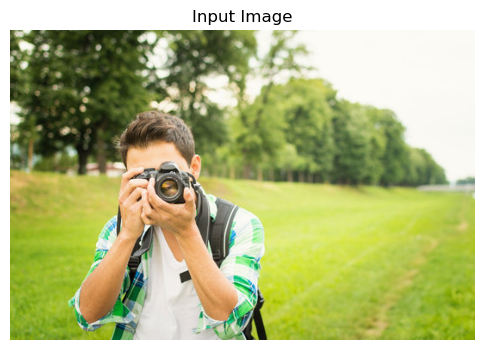

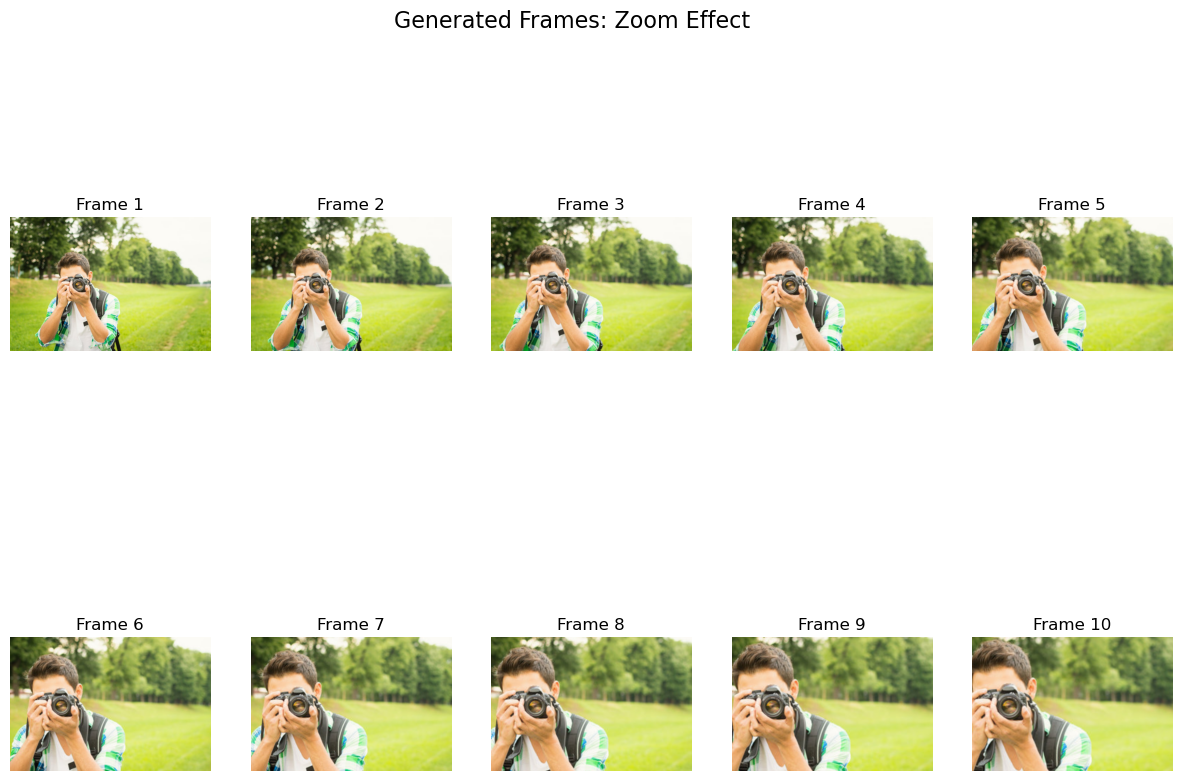

Video saved as zoom_effect.mp4


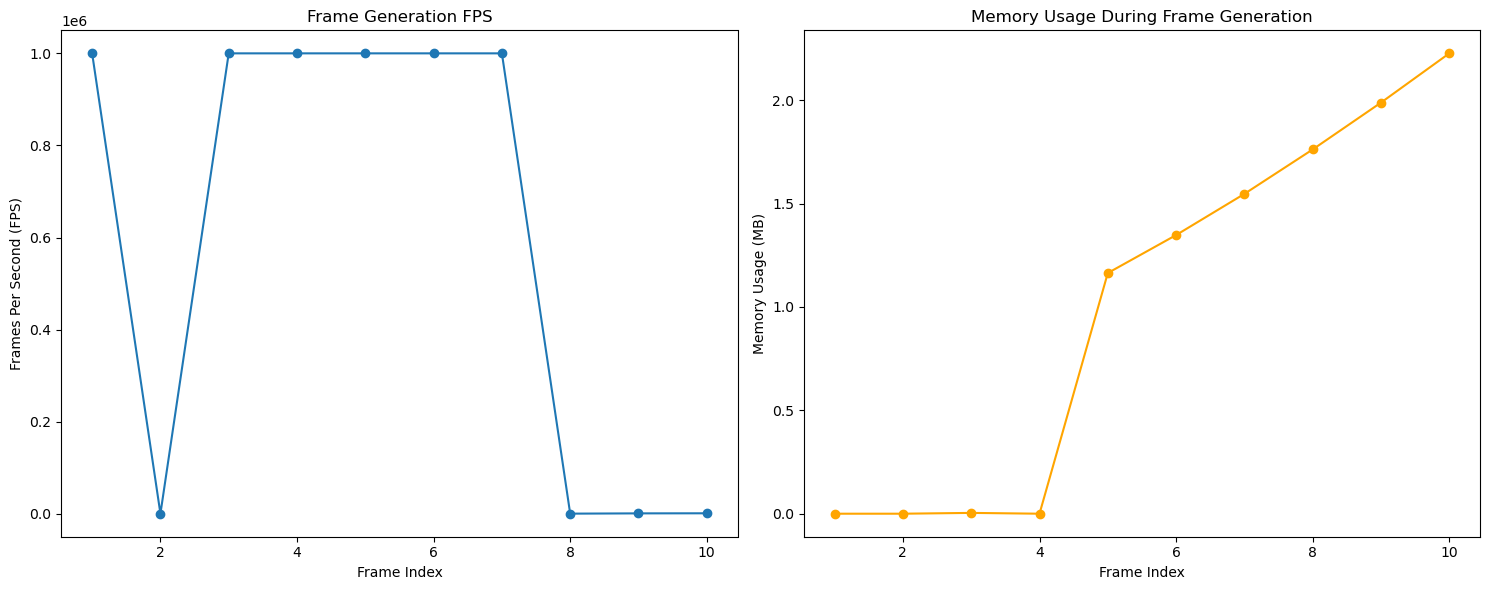

In [13]:
import cv2
import numpy as np
from tqdm import tqdm
import psutil
import time
import matplotlib.pyplot as plt
from PIL import Image

# Function to Generate Animation Frames
def generate_frames(image, effect_type, num_frames=10):
    """
    Generate animation frames for the specified effect.
    """
    frames = []
    height, width, _ = image.shape

    if effect_type == "zoom":
        for scale in np.linspace(1, 2, num_frames):
            resized = cv2.resize(image, None, fx=scale, fy=scale)
            x_start = (resized.shape[1] - width) // 2
            y_start = (resized.shape[0] - height) // 2
            cropped = resized[y_start:y_start+height, x_start:x_start+width]
            frames.append(cropped)

    elif effect_type == "rotation":
        for angle in np.linspace(0, 360, num_frames):
            M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
            rotated = cv2.warpAffine(image, M, (width, height))
            frames.append(rotated)

    elif effect_type == "blur":
        for kernel_size in range(1, num_frames * 2, 2):
            blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            frames.append(blurred)

    return frames

# Function to Save Video
def save_video(frames, output_path, fps=10):
    """
    Save generated frames as an MP4 video file.
    """
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    for frame in frames:
        video_writer.write(frame)
    video_writer.release()

# Function to Plot Metrics
def plot_metrics(fps_times, memory_usage):
    """
    Plot FPS and memory usage during frame generation.
    """
    # Add epsilon to avoid division by zero
    epsilon = 1e-6
    fps_values = [1 / (t + epsilon) for t in fps_times]  # Avoid division by zero

    plt.figure(figsize=(15, 6))

    # FPS Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(fps_values) + 1), fps_values, marker='o')
    plt.title("Frame Generation FPS")
    plt.xlabel("Frame Index")
    plt.ylabel("Frames Per Second (FPS)")

    # Memory Usage Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(memory_usage) + 1), memory_usage, marker='o', color='orange')
    plt.title("Memory Usage During Frame Generation")
    plt.xlabel("Frame Index")
    plt.ylabel("Memory Usage (MB)")

    plt.tight_layout()
    plt.show()

# Main Function
if __name__ == "__main__":
    # Load Input Image
    input_image_path = "image.jpg"  # Replace with your image path
    input_image = Image.open(input_image_path)
    input_image_cv = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

    # Display Input Image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Generate Frames for the Zoom Effect
    effect_type = "zoom"
    num_frames = 10
    fps_times = []
    memory_usage = []
    process = psutil.Process()

    frames = []
    for scale in np.linspace(1, 2, num_frames):
        mem_before = process.memory_info().rss / (1024 * 1024)  # Memory in MB
        start_frame_time = time.time()

        resized = cv2.resize(input_image_cv, None, fx=scale, fy=scale)
        x_start = (resized.shape[1] - input_image_cv.shape[1]) // 2
        y_start = (resized.shape[0] - input_image_cv.shape[0]) // 2
        cropped = resized[y_start:y_start+input_image_cv.shape[0], x_start:x_start+input_image_cv.shape[1]]

        end_frame_time = time.time()
        mem_after = process.memory_info().rss / (1024 * 1024)  # Memory in MB

        fps_times.append(end_frame_time - start_frame_time)
        memory_usage.append(mem_after - mem_before)
        frames.append(cropped)

    # Display Generated Frames
    plt.figure(figsize=(15, 10))
    for i, frame in enumerate(frames, 1):
        plt.subplot(2, 5, i)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Frame {i}")

    plt.suptitle("Generated Frames: Zoom Effect", fontsize=16)
    plt.show()

    # Save Video
    output_video_path = "zoom_effect.mp4"
    save_video(frames, output_video_path)
    print(f"Video saved as {output_video_path}")

    # Plot FPS and Memory Usage
    plot_metrics(fps_times, memory_usage)


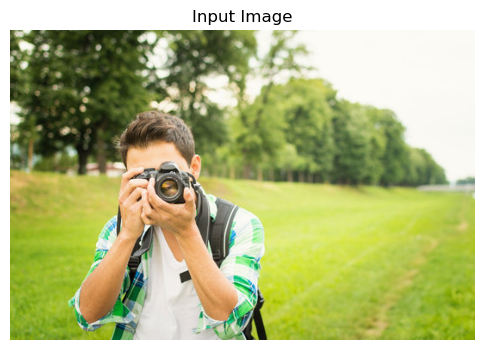

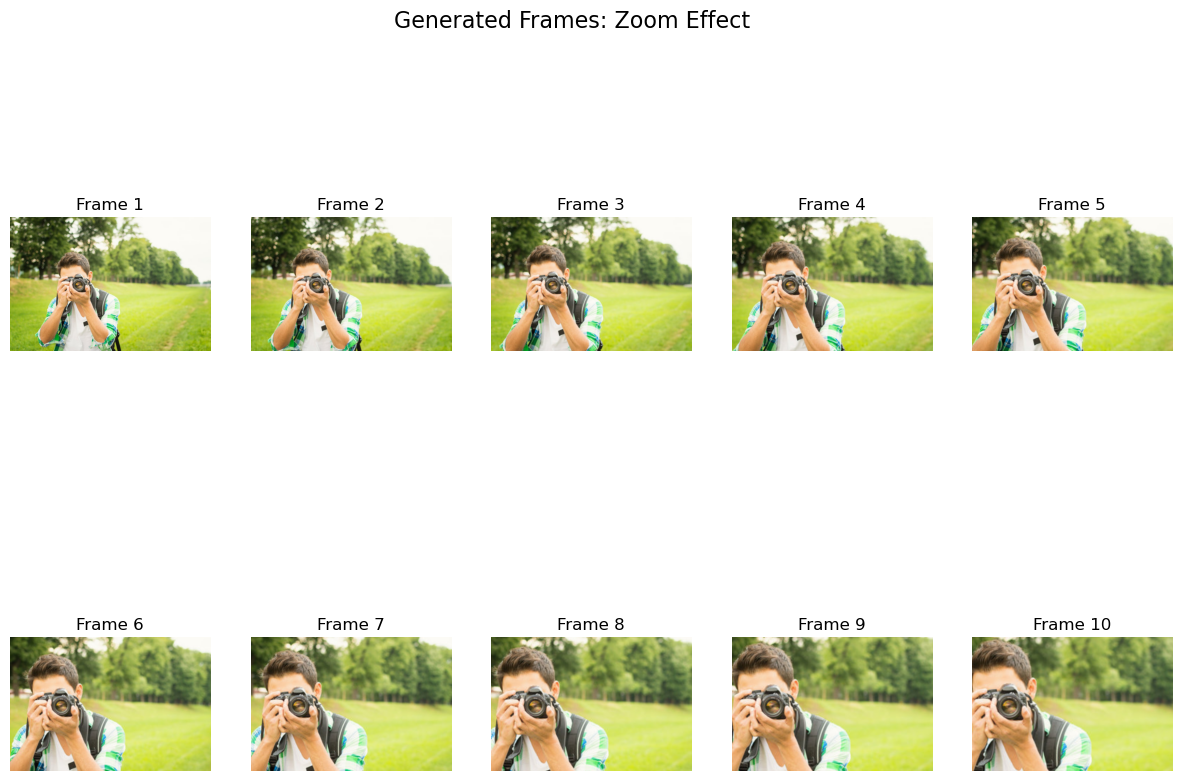

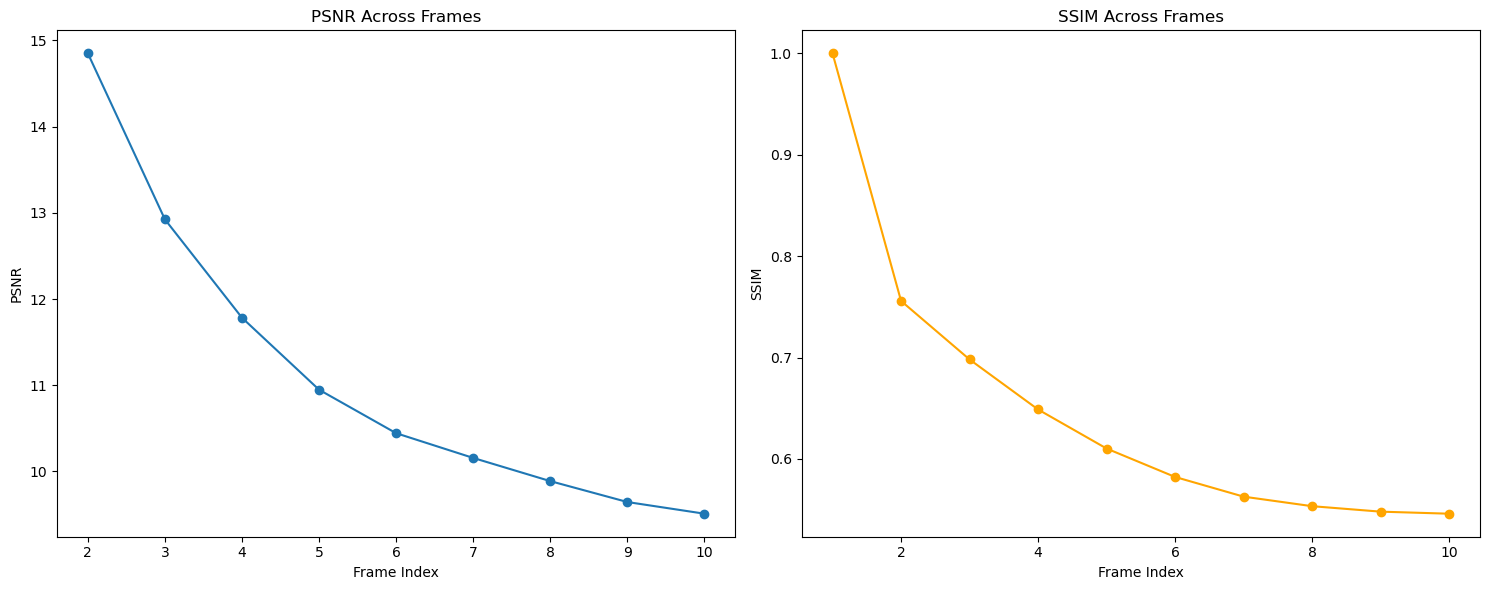

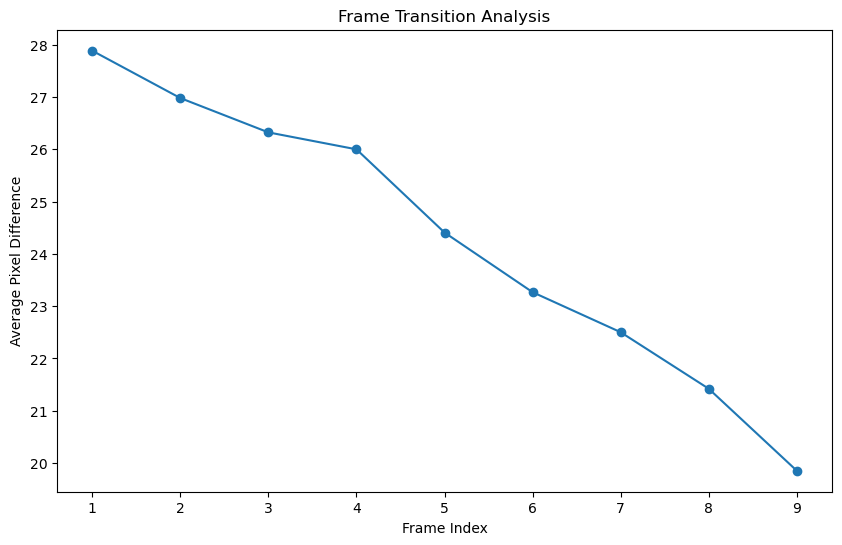

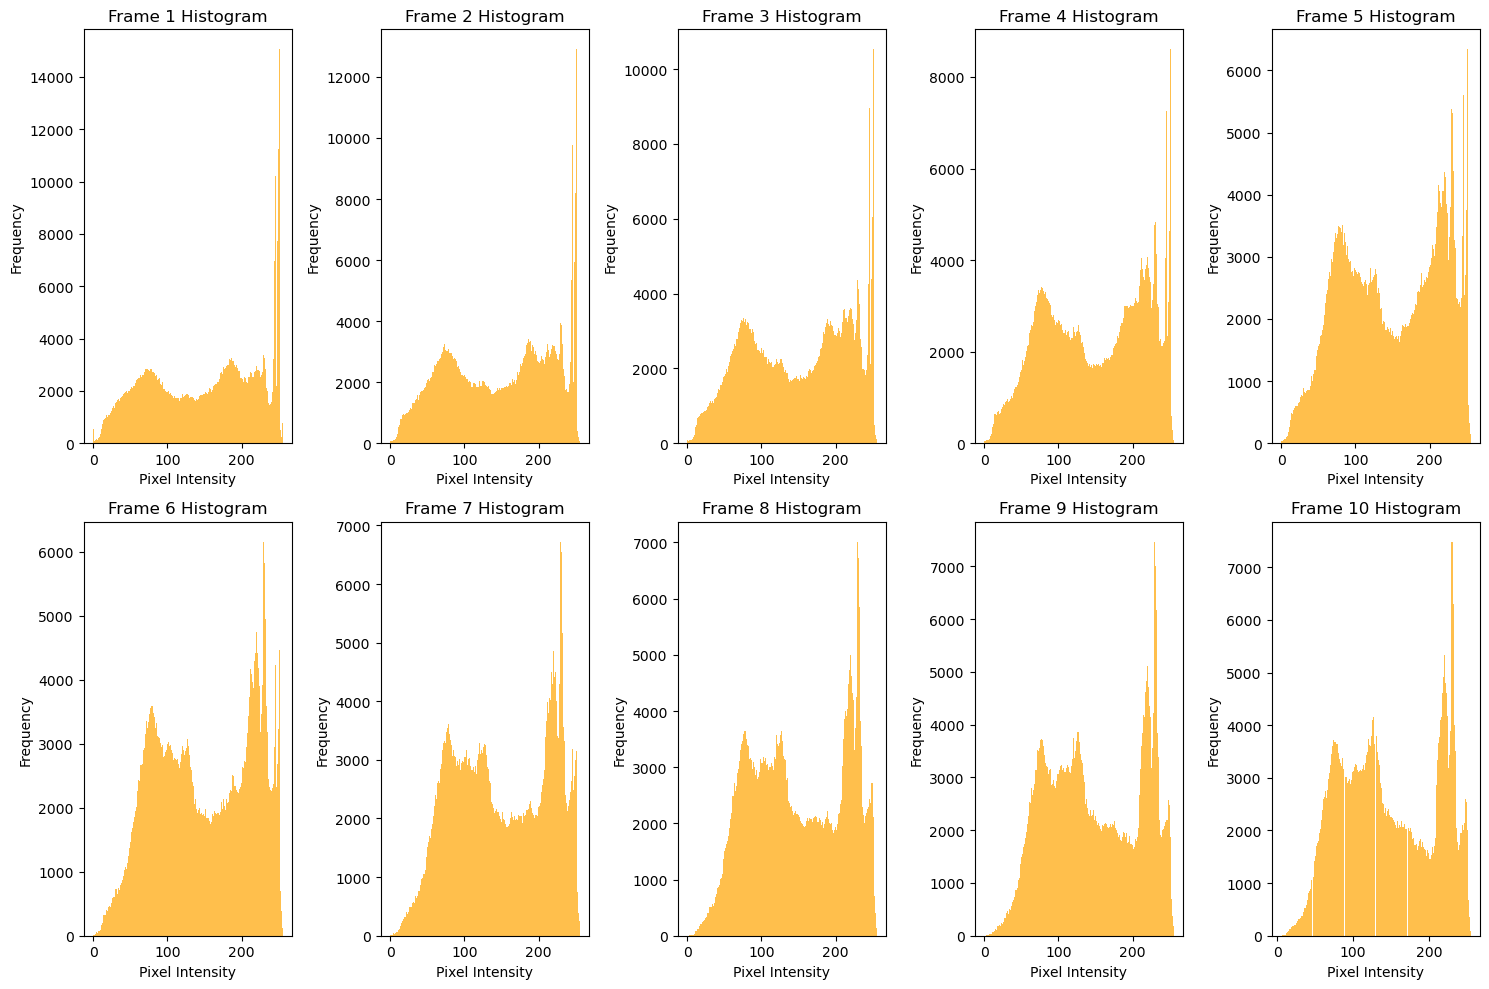

Video saved as zoom_effect.mp4


In [21]:
import cv2
import numpy as np
from tqdm import tqdm
import psutil
import time
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from PIL import Image

# Function to Generate Animation Frames
def generate_frames(image, effect_type, num_frames=10):
    """
    Generate animation frames for the specified effect.
    """
    frames = []
    height, width, _ = image.shape

    if effect_type == "zoom":
        for scale in np.linspace(1, 2, num_frames):
            resized = cv2.resize(image, None, fx=scale, fy=scale)
            x_start = (resized.shape[1] - width) // 2
            y_start = (resized.shape[0] - height) // 2
            cropped = resized[y_start:y_start+height, x_start:x_start+width]
            frames.append(cropped)

    elif effect_type == "rotation":
        for angle in np.linspace(0, 360, num_frames):
            M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
            rotated = cv2.warpAffine(image, M, (width, height))
            frames.append(rotated)

    elif effect_type == "blur":
        for kernel_size in range(1, num_frames * 2, 2):
            blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            frames.append(blurred)

    return frames

# Function to Compute PSNR and SSIM
def compute_metrics(frames, reference):
    """
    Compute PSNR and SSIM for all frames compared to the reference image.
    """
    psnr_values = []
    ssim_values = []
    for frame in frames:
        # Check frame size
        if frame.shape[0] < 7 or frame.shape[1] < 7:
            psnr_values.append(0)
            ssim_values.append(0)
            continue

        # PSNR Calculation
        psnr_values.append(psnr(reference, frame))

        # SSIM Calculation with adjusted window size
        ssim_values.append(ssim(reference, frame, multichannel=True, win_size=3))
    return psnr_values, ssim_values

# Function to Plot Histograms for Frames
def plot_histograms(frames):
    plt.figure(figsize=(15, 10))
    for i, frame in enumerate(frames[:10], 1):  # Limit to 10 frames for display
        plt.subplot(2, 5, i)
        plt.hist(frame.ravel(), bins=256, color='orange', alpha=0.7)
        plt.title(f"Frame {i} Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Function to Plot Frame Transition Analysis
def plot_frame_transitions(frames):
    transitions = []
    for i in range(1, len(frames)):
        diff = np.abs(frames[i].astype(np.int32) - frames[i - 1].astype(np.int32))
        transitions.append(np.mean(diff))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(transitions) + 1), transitions, marker='o')
    plt.title("Frame Transition Analysis")
    plt.xlabel("Frame Index")
    plt.ylabel("Average Pixel Difference")
    plt.show()

# Function to Save Video
def save_video(frames, output_path, fps=10):
    """
    Save generated frames as an MP4 video file.
    """
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    for frame in frames:
        video_writer.write(frame)
    video_writer.release()

# Main Function
if __name__ == "__main__":
    # Load Input Image
    input_image_path = "image.jpg"  # Replace with your image path
    input_image = Image.open(input_image_path)
    input_image_cv = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

    # Display Input Image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Generate Frames
    effect_type = "zoom"  # Change to "rotation" or "blur" for other effects
    num_frames = 10
    frames = generate_frames(input_image_cv, effect_type, num_frames)

    # Compute Metrics
    psnr_values, ssim_values = compute_metrics(frames, input_image_cv)

    # Display Generated Frames
    plt.figure(figsize=(15, 10))
    for i, frame in enumerate(frames, 1):
        plt.subplot(2, 5, i)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Frame {i}")
    plt.suptitle("Generated Frames: Zoom Effect", fontsize=16)
    plt.show()

    # Plot PSNR and SSIM
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(psnr_values) + 1), psnr_values, marker='o')
    plt.title("PSNR Across Frames")
    plt.xlabel("Frame Index")
    plt.ylabel("PSNR")

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(ssim_values) + 1), ssim_values, marker='o', color='orange')
    plt.title("SSIM Across Frames")
    plt.xlabel("Frame Index")
    plt.ylabel("SSIM")

    plt.tight_layout()
    plt.show()

    # Plot Frame Transition Analysis
    plot_frame_transitions(frames)

    # Plot Histograms
    plot_histograms(frames)

    # Save Video
    output_video_path = "zoom_effect.mp4"
    save_video(frames, output_video_path)
    print(f"Video saved as {output_video_path}")


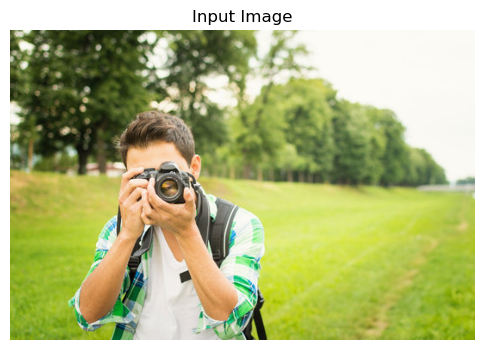

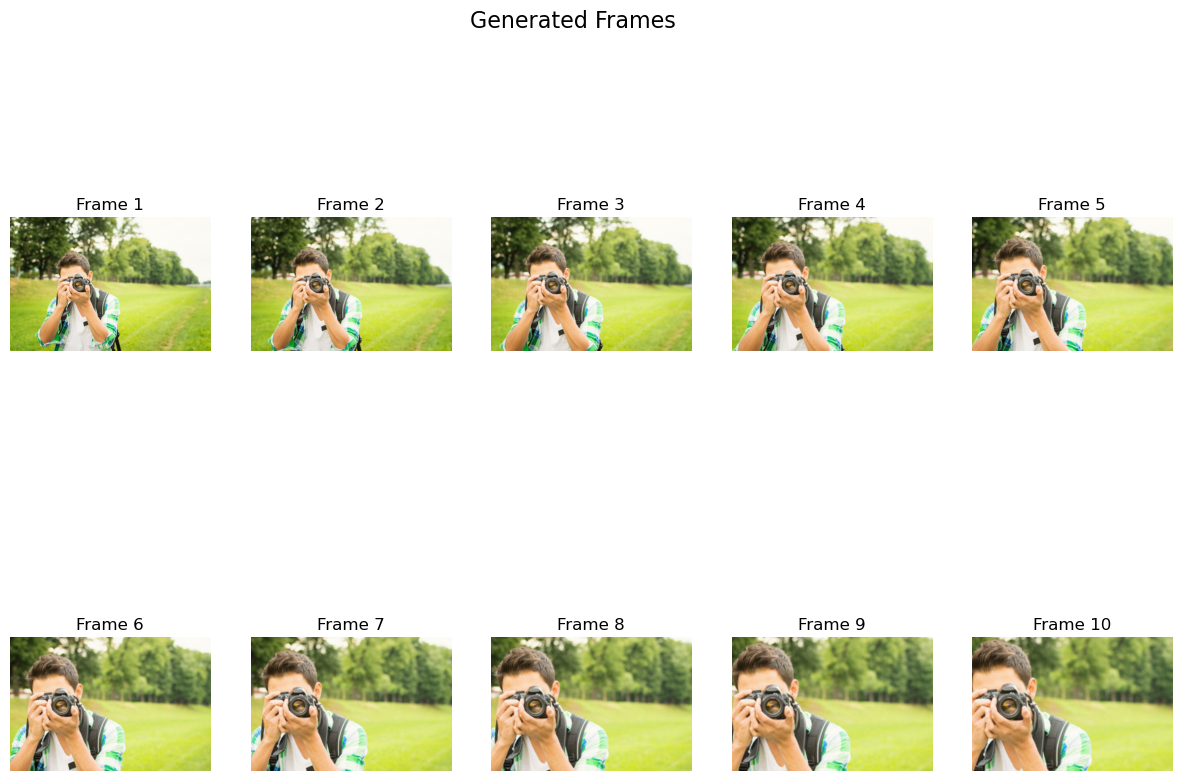

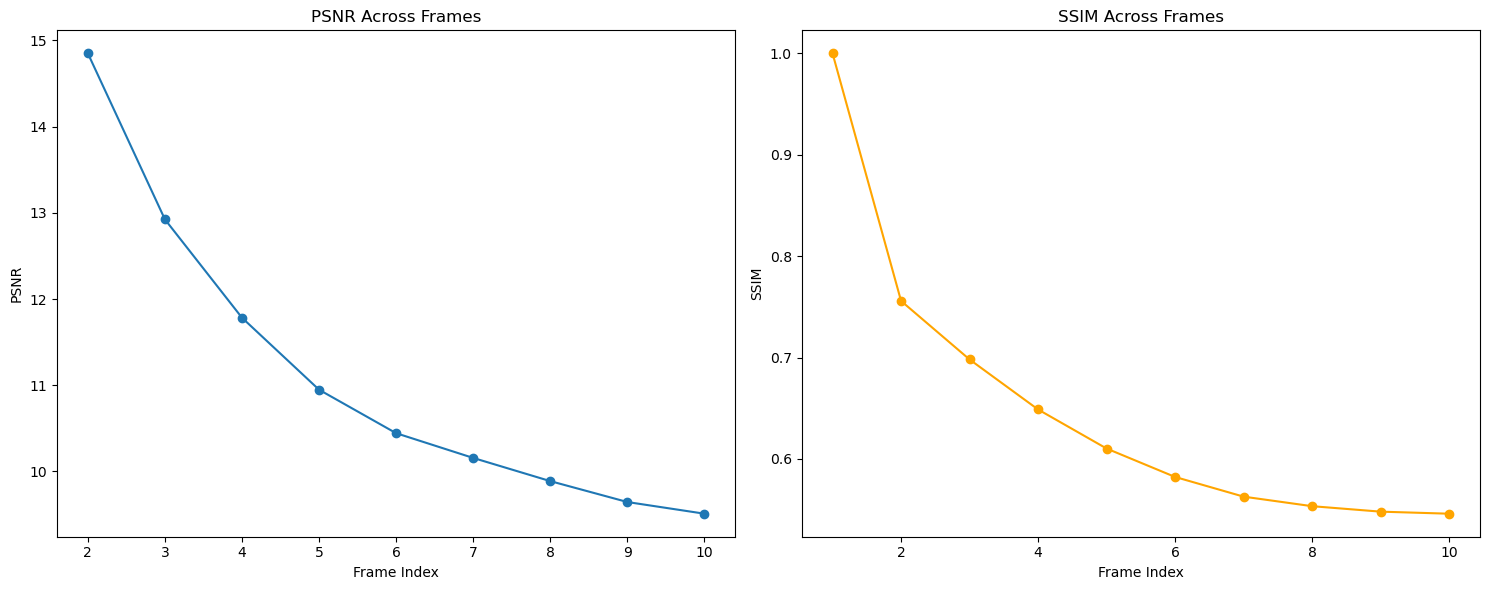

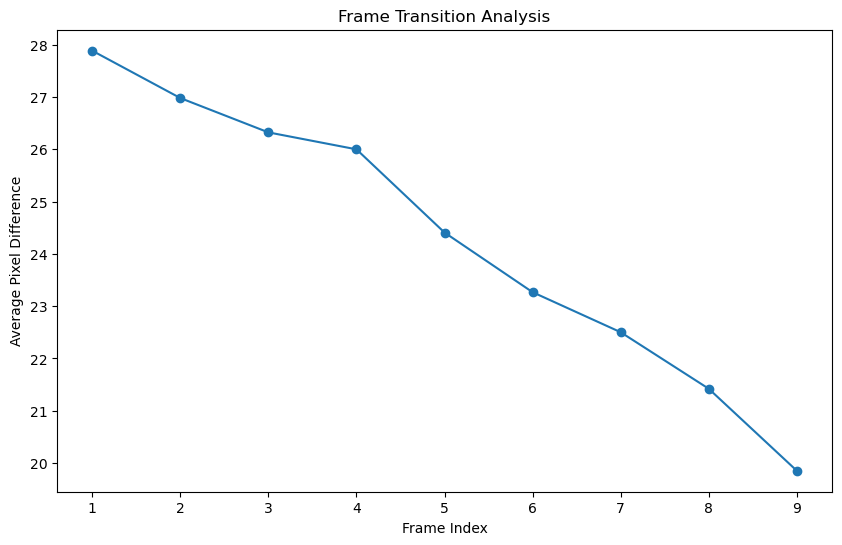

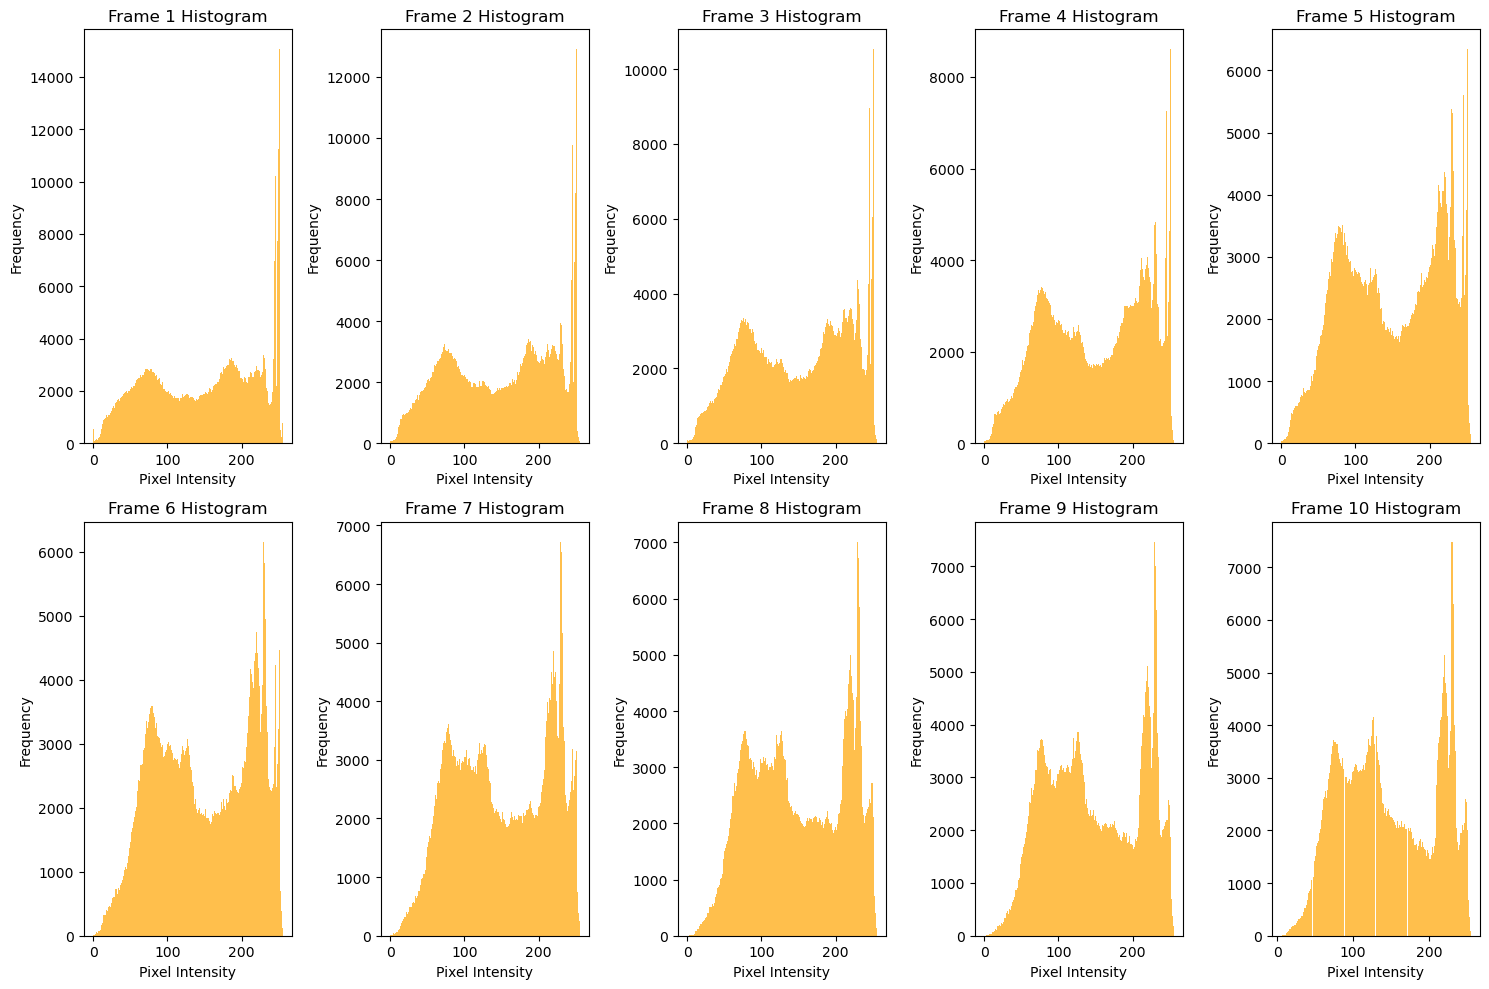

Video saved as zoom_effect.mp4


In [23]:
import cv2
import numpy as np
from tqdm import tqdm
import psutil
import time
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from PIL import Image

# Function to Generate Animation Frames
def generate_frames(image, effect_type, num_frames=10):
    """
    Generate animation frames for the specified effect.
    """
    frames = []
    height, width, _ = image.shape

    if effect_type == "zoom":
        for scale in np.linspace(1, 2, num_frames):
            resized = cv2.resize(image, None, fx=scale, fy=scale)
            x_start = (resized.shape[1] - width) // 2
            y_start = (resized.shape[0] - height) // 2
            cropped = resized[y_start:y_start+height, x_start:x_start+width]
            frames.append(cropped)

    elif effect_type == "rotation":
        for angle in np.linspace(0, 360, num_frames):
            M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
            rotated = cv2.warpAffine(image, M, (width, height))
            frames.append(rotated)

    elif effect_type == "blur":
        for kernel_size in range(1, num_frames * 2, 2):
            blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            frames.append(blurred)

    return frames

# Function to Compute PSNR and SSIM
def compute_metrics(frames, reference):
    """
    Compute PSNR and SSIM for all frames compared to the reference image.
    """
    psnr_values = []
    ssim_values = []
    for frame in frames:
        if frame.shape[0] < 7 or frame.shape[1] < 7:
            psnr_values.append(0)
            ssim_values.append(0)
            continue

        psnr_values.append(psnr(reference, frame))
        ssim_values.append(ssim(reference, frame, multichannel=True, win_size=3))
    return psnr_values, ssim_values

# Function to Plot Histograms
def plot_histograms(frames):
    plt.figure(figsize=(15, 10))
    for i, frame in enumerate(frames[:10], 1):
        plt.subplot(2, 5, i)
        plt.hist(frame.ravel(), bins=256, color='orange', alpha=0.7)
        plt.title(f"Frame {i} Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Function to Plot Frame Transition Analysis
def plot_frame_transitions(frames):
    transitions = []
    for i in range(1, len(frames)):
        diff = np.abs(frames[i].astype(np.int32) - frames[i - 1].astype(np.int32))
        transitions.append(np.mean(diff))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(transitions) + 1), transitions, marker='o')
    plt.title("Frame Transition Analysis")
    plt.xlabel("Frame Index")
    plt.ylabel("Average Pixel Difference")
    plt.show()

# Function to Save Video
def save_video(frames, output_path, fps=10):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    for frame in frames:
        video_writer.write(frame)
    video_writer.release()

# Main Function
if __name__ == "__main__":
    # Load Input Image
    input_image_path = "image.jpg"  # Replace with your image path
    input_image = Image.open(input_image_path)
    input_image_cv = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

    # Display Input Image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Generate Frames
    effect_type = "zoom"  # Change to "rotation" or "blur" for other effects
    num_frames = 10
    frames = generate_frames(input_image_cv, effect_type, num_frames)

    # Compute Metrics
    psnr_values, ssim_values = compute_metrics(frames, input_image_cv)

    # Display Generated Frames
    plt.figure(figsize=(15, 10))
    for i, frame in enumerate(frames, 1):
        plt.subplot(2, 5, i)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Frame {i}")
    plt.suptitle("Generated Frames", fontsize=16)
    plt.show()

    # Plot PSNR and SSIM
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(psnr_values) + 1), psnr_values, marker='o')
    plt.title("PSNR Across Frames")
    plt.xlabel("Frame Index")
    plt.ylabel("PSNR")

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(ssim_values) + 1), ssim_values, marker='o', color='orange')
    plt.title("SSIM Across Frames")
    plt.xlabel("Frame Index")
    plt.ylabel("SSIM")
    plt.tight_layout()
    plt.show()

    # Plot Frame Transition Analysis
    plot_frame_transitions(frames)

    # Plot Histograms
    plot_histograms(frames)

    # Save Video
    output_video_path = "zoom_effect.mp4"
    save_video(frames, output_video_path)
    print(f"Video saved as {output_video_path}")


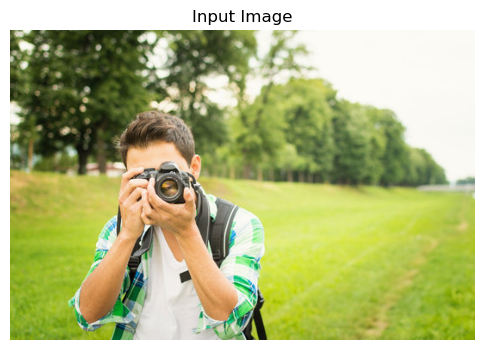

Enter your command (e.g., 'zoom animation with 20 frames at 15 fps'):


>  zoom animation with 20 frames at 15 fps


Effect: zoom, Frames: 10, FPS: 10


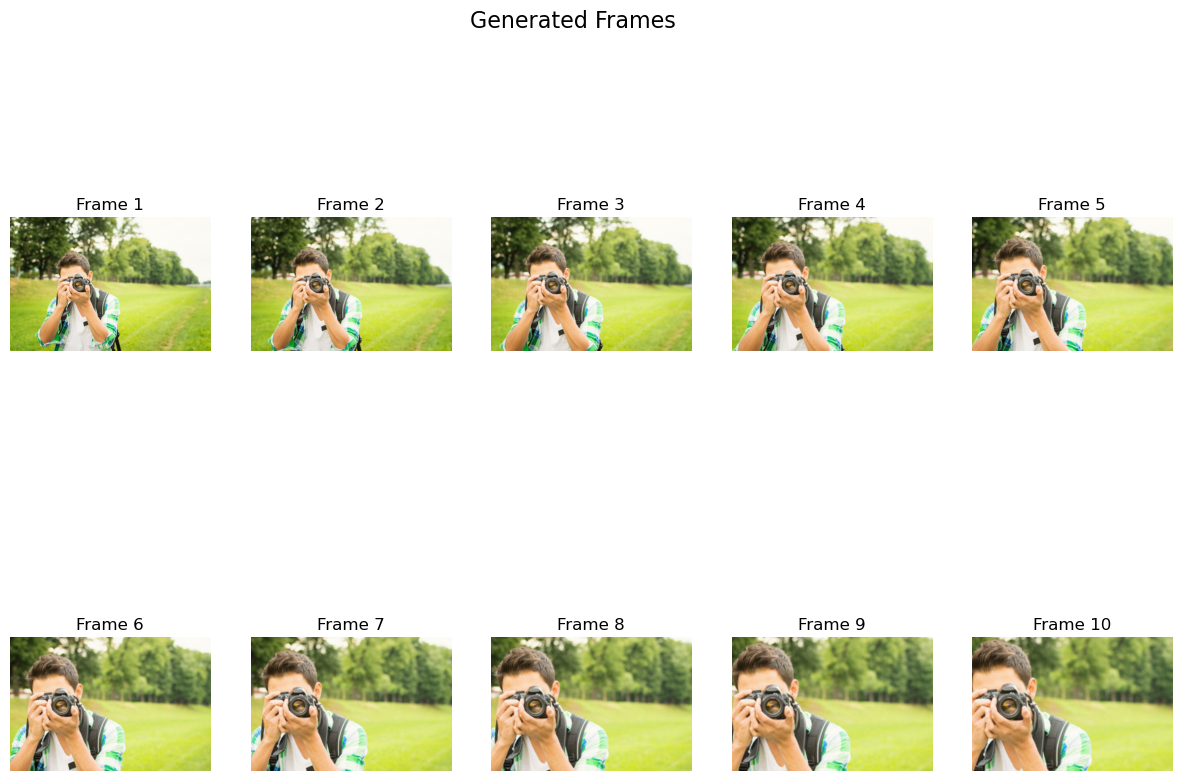

Video saved as zoom_animation.mp4


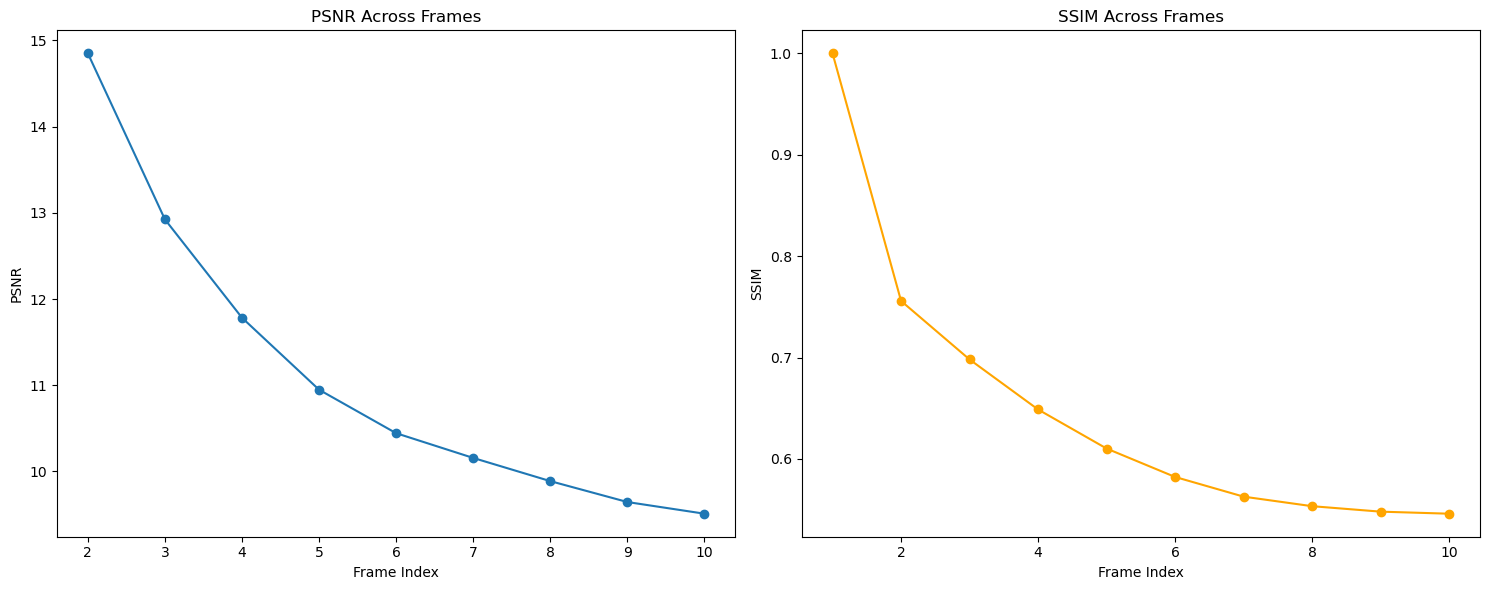

In [27]:
import cv2
import numpy as np
from tqdm import tqdm
import psutil
import time
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from PIL import Image

# Function to Generate Animation Frames
def generate_frames(image, effect_type, num_frames=10):
    """
    Generate animation frames for the specified effect.
    """
    frames = []
    height, width, _ = image.shape

    if effect_type == "zoom":
        for scale in np.linspace(1, 2, num_frames):
            resized = cv2.resize(image, None, fx=scale, fy=scale)
            x_start = (resized.shape[1] - width) // 2
            y_start = (resized.shape[0] - height) // 2
            cropped = resized[y_start:y_start+height, x_start:x_start+width]
            frames.append(cropped)

    elif effect_type == "rotation":
        for angle in np.linspace(0, 360, num_frames):
            M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
            rotated = cv2.warpAffine(image, M, (width, height))
            frames.append(rotated)

    elif effect_type == "blur":
        for kernel_size in range(1, num_frames * 2, 2):
            blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            frames.append(blurred)

    return frames

# Function to Compute PSNR and SSIM
def compute_metrics(frames, reference):
    """
    Compute PSNR and SSIM for all frames compared to the reference image.
    """
    psnr_values = []
    ssim_values = []
    for frame in frames:
        if frame.shape[0] < 7 or frame.shape[1] < 7:
            psnr_values.append(0)
            ssim_values.append(0)
            continue

        psnr_values.append(psnr(reference, frame))
        ssim_values.append(ssim(reference, frame, multichannel=True, win_size=3))
    return psnr_values, ssim_values

# Function to Save Video
def save_video(frames, output_path, fps=10):
    """
    Save generated frames as an MP4 video file.
    """
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    for frame in frames:
        video_writer.write(frame)
    video_writer.release()

# Function to Process User Command
def process_command(command):
    """
    Parse user command to determine animation type, frame count, and frame rate.
    """
    if "zoom" in command.lower():
        effect_type = "zoom"
    elif "rotate" in command.lower():
        effect_type = "rotation"
    elif "blur" in command.lower():
        effect_type = "blur"
    else:
        raise ValueError("Invalid command. Please specify 'zoom', 'rotate', or 'blur'.")

    # Extract other parameters (optional)
    num_frames = 10
    fps = 10
    if "frames" in command:
        try:
            num_frames = int(command.split("frames")[1].strip().split()[0])
        except:
            pass
    if "fps" in command:
        try:
            fps = int(command.split("fps")[1].strip().split()[0])
        except:
            pass

    return effect_type, num_frames, fps

# Main Function
if __name__ == "__main__":
    # Load Input Image
    input_image_path = "image.jpg"  # Replace with your image path
    input_image = Image.open(input_image_path)
    input_image_cv = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

    # Display Input Image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # User Interaction: Get Command
    print("Enter your command (e.g., 'zoom animation with 20 frames at 15 fps'):")
    user_command = input("> ")

    try:
        # Process Command
        effect_type, num_frames, fps = process_command(user_command)
        print(f"Effect: {effect_type}, Frames: {num_frames}, FPS: {fps}")

        # Generate Frames
        frames = generate_frames(input_image_cv, effect_type, num_frames)

        # Compute Metrics
        psnr_values, ssim_values = compute_metrics(frames, input_image_cv)

        # Display Generated Frames
        plt.figure(figsize=(15, 10))
        for i, frame in enumerate(frames, 1):
            plt.subplot(2, 5, i)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Frame {i}")
        plt.suptitle("Generated Frames", fontsize=16)
        plt.show()

        # Save Video
        output_video_path = f"{effect_type}_animation.mp4"
        save_video(frames, output_video_path, fps)
        print(f"Video saved as {output_video_path}")

        # Plot PSNR and SSIM
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(psnr_values) + 1), psnr_values, marker='o')
        plt.title("PSNR Across Frames")
        plt.xlabel("Frame Index")
        plt.ylabel("PSNR")

        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(ssim_values) + 1), ssim_values, marker='o', color='orange')
        plt.title("SSIM Across Frames")
        plt.xlabel("Frame Index")
        plt.ylabel("SSIM")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error: {e}")


In [7]:
pip install --upgrade langchain


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install langchain-openai


   ---------------------------------------- 0.0/883.8 kB ? eta -:--:--
   --------------------------------------- 883.8/883.8 kB 38.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
